# Single Portfolio Analysis For 4 Equity 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing data into a dataframe as df
df = pd.read_excel('/Users/sunitjadeja/Desktop/TISS All Subject/Financial Econometrics/Bino Sir/Python_Potfolio_Analysis.xlsx')

In [3]:
df.head(10)

,Date,Close Price TCS,Close Price Infosys,Close Price RIL,Close Price Tata Motors
0,2020-04-01,1709.55,604.10,1080.65,67.95
1,2020-04-03,1654.40,585.45,1078.20,65.30
2,2020-04-07,1775.05,641.10,1206.40,67.35
3,2020-04-08,1705.60,631.70,1192.15,67.60
4,2020-04-09,1765.90,637.60,1219.20,74.60
5,2020-04-13,1758.40,637.10,1189.25,74.30
6,2020-04-15,1734.45,639.15,1150.05,72.85
7,2020-04-16,1715.60,624.20,1168.70,74.65
8,2020-04-17,1806.80,629.30,1225.05,76.85
9,2020-04-20,1818.80,652.90,1244.45,80.50


In [4]:
# Checking for the null values in data
df.isnull().sum()

Date                       0
Close Price TCS            0
Close Price Infosys        0
Close Price RIL            0
Close Price Tata Motors    0
dtype: int64

In [5]:
# Converting 'Date' column to date datatype
df['Date'] = pd.to_datetime(df['Date'])
# Setting 'Date' as index of the data set 
df.index = df['Date']
# Droping the orginal 'Date' column
df =df.drop(['Date'], axis=1)

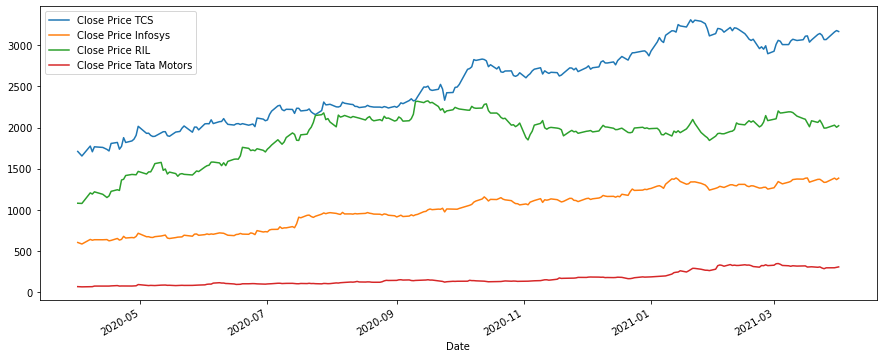

In [6]:
#Plotting the data without normalizing the price
df.plot (figsize = (15, 6))
plt.show()

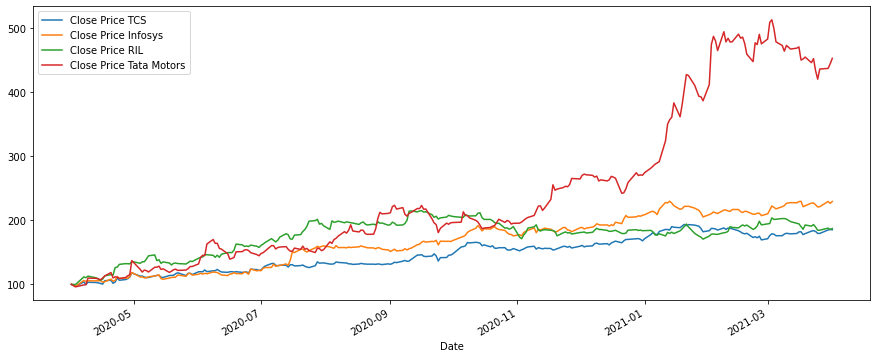

In [7]:
# Normalize the data & than plotting change is seen in Tata Motors
(df / df.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

# Calculating Simple Returns

In [8]:
simple_returns = (df/df.shift(1))-1
simple_returns.head()

,Close Price TCS,Close Price Infosys,Close Price RIL,Close Price Tata Motors
Date,,,,
2020-04-01,NaN,NaN,NaN,NaN
2020-04-03,-0.032260,-0.030872,-0.002267,-0.038999
2020-04-07,0.072927,0.095055,0.118902,0.031394
2020-04-08,-0.039126,-0.014662,-0.011812,0.003712
2020-04-09,0.035354,0.009340,0.022690,0.103550


In [9]:
simple_returns.mean() * 252

Close Price TCS            0.667014
Close Price Infosys        0.891542
Close Price RIL            0.698134
Close Price Tata Motors    1.691388
dtype: float64

# Variance-Covariance Matrix

In [10]:
simple_returns.cov()

,Close Price TCS,Close Price Infosys,Close Price RIL,Close Price Tata Motors
Close Price TCS,0.000343,0.000263,0.000141,0.000219
Close Price Infosys,0.000263,0.000406,0.000114,0.000190
Close Price RIL,0.000141,0.000114,0.000512,0.000215
Close Price Tata Motors,0.000219,0.000190,0.000215,0.001298


# Correaltion Matrix

In [11]:
simple_returns.corr()

,Close Price TCS,Close Price Infosys,Close Price RIL,Close Price Tata Motors
Close Price TCS,1.000000,0.706226,0.336358,0.328913
Close Price Infosys,0.706226,1.000000,0.250660,0.261381
Close Price RIL,0.336358,0.250660,1.000000,0.263975
Close Price Tata Motors,0.328913,0.261381,0.263975,1.000000


In [12]:
num_assets = len(df.columns)
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.1447005 , 0.06619554, 0.31381049, 0.47529347])

In [13]:
sum(weights)

0.9999999999999999

# Expected portfolio return

In [14]:
np.sum(weights * simple_returns.mean()) * 252

1.178520959938632

# Expected portfolio variance

In [15]:
np.dot(weights.T, np.dot(simple_returns.cov() * 252, weights))

0.12134499950793796

# Expected portfolio volatility

In [16]:
np.sqrt(np.dot(weights.T,np.dot(simple_returns.cov() * 252, weights)))

0.34834609156403346

# Using For Loop To Maximize Return, Less Volatality & To Maximize Sharp Ratio

In [17]:
pfolio_returns = []
pfolio_volatilities = []
wt=[]
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * simple_returns.mean()) * 252)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(simple_returns.cov() * 252, weights))))
    wt.append(np.str(weights))
    #wt.append(weights)
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
wt=np.array(wt)



pfolio_returns, pfolio_volatilities,wt

(array([0.97131994, 1.20785009, 0.87752186, 1.18557999, 1.07996852,
        0.97491188, 1.11528288, 0.80852113, 1.13643344, 1.04034718,
        0.95620019, 0.83588487, 0.9405265 , 0.8111938 , 0.995548  ,
        0.89572795, 1.0391356 , 1.19622787, 0.93118338, 1.10855535,
        0.97024899, 1.01106094, 1.09885746, 0.96497333, 0.871101  ,
        1.07104097, 0.88870577, 0.78964936, 0.81614011, 1.09189423,
        0.84645156, 1.03327307, 1.18237164, 0.89144635, 1.1373015 ,
        1.0594486 , 1.17796117, 0.82040848, 0.85705936, 0.78982527,
        1.08485299, 1.03514394, 1.23467648, 1.06738923, 1.34880628,
        0.89285335, 0.90560771, 1.09154163, 0.84425468, 0.9769527 ,
        0.92634495, 1.03693551, 1.0751684 , 1.00745984, 0.88753125,
        0.73301691, 1.1742436 , 1.10597995, 0.96987531, 0.85914387,
        0.80130415, 0.92728206, 1.089057  , 0.99777572, 1.27937972,
        0.98862893, 0.93887502, 1.01157505, 0.7464002 , 1.1589011 ,
        1.0749082 , 0.93463979, 0.87203944, 0.83

In [18]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities,"Sharp Ratio":pfolio_returns/pfolio_volatilities,"weight":(wt)})

# Data Table With Different Weights

In [19]:
portfolios.head()

,Return,Volatility,Sharp Ratio,weight
0,0.971320,0.271143,3.582317,[0.24183597 0.37405238 0.1743293 0.20978236]
1,1.207850,0.350565,3.445435,[0.19910323 0.1286268 0.17790037 0.4943696 ]
2,0.877522,0.262956,3.337138,[0.23054943 0.50938278 0.17142589 0.08864189]
3,1.185580,0.354870,3.340884,[0.34658714 0.01465773 0.13999369 0.49876144]
4,1.079969,0.319035,3.385115,[0.17517047 0.06217062 0.38484877 0.37781015]


3.695239923615522

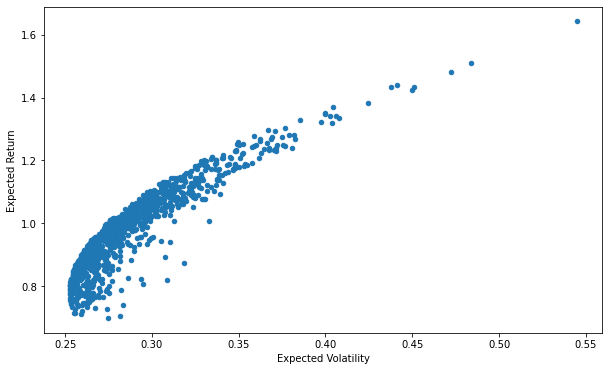

In [20]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
portfolios["Sharp Ratio"].max()

In [21]:
portfolios[portfolios["Sharp Ratio"]==portfolios["Sharp Ratio"].max()]

,Return,Volatility,Sharp Ratio,weight
658,1.124241,0.30424,3.69524,[0.04153353 0.45686569 0.16026066 0.34134012]
